In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

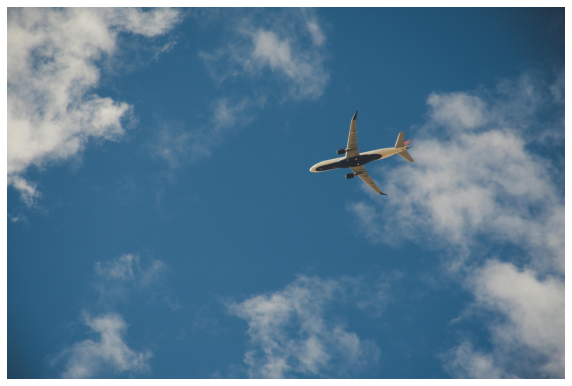

In [2]:
#file_path = "C:/Users/User/Desktop/Unique Minds/pexels-brett-sayles.jpg"
#plt.figure(figsize=(10, 10))  # Width, Height
# Load the image
#img = mpimg.imread(file_path)
# Display the image
#plt.imshow(img)
#plt.axis('off')
#plt.show()

In [3]:
# Βρείτε το file path που κατεβάσατε το αρχείο
#π.χ.
#file_path = "/path/to/your/Downloads/example.csv"

file_path = "C:/Users/User/Desktop/Unique Minds/ryanair_reviews.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path,index_col=0,parse_dates=True)

In [4]:
#Η μέθοδος head επιστρέφει τις x πρώτες γραμμές
df.head(3)

,Date Published,Overall Rating,Passenger Country,Trip_verified,Comment title,Comment,Aircraft,Type Of Traveller,Seat Type,Origin,Destination,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Inflight Entertainment,Wifi & Connectivity
0,2024-02-03,10.0,United Kingdom,Not Verified,"""bang on time and smooth flights""",Flew back from Faro to London Luton Friday 2nd...,Boeing 737 900,Family Leisure,Economy Class,Faro,Luton,February 2024,4.0,5.0,3.0,4.0,4.0,yes,NaN,NaN
1,2024-01-26,10.0,United Kingdom,Trip Verified,"""Another good affordable flight""",Another good affordable flight with Ryanair. O...,NaN,Couple Leisure,Economy Class,Belfast,Alicante,January 2024,3.0,5.0,3.0,5.0,5.0,yes,NaN,NaN
2,2024-01-20,10.0,United Kingdom,Trip Verified,“Really impressed!”,"Really impressed! You get what you pay for, th...",Boeing 737-800,Couple Leisure,Economy Class,Edinburgh,Paris Beauvais,October 2023,5.0,5.0,4.0,5.0,5.0,yes,NaN,NaN


In [5]:
#Μετατρέπουμε τις στήλες με ημερομηνίες σε αντικείμενα ημερομηνιών.
df['Date Published'] = pd.to_datetime(df['Date Published'])
df['Date Flown'] = pd.to_datetime(df['Date Flown'])

In [6]:
#Μπορούμε επίσης να λάβουμε μερικά στατιστικά στοιχεία για τα περιεχόμενα κάθε στήλης με τη μέθοδο describe!
df.describe()

,Overall Rating,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Inflight Entertainment,Wifi & Connectivity
count,2119.000000,2137.000000,2128.000000,1312.000000,1578.000000,2248.000000,331.000000,268.000000
mean,4.380368,2.373421,2.747180,1.921494,2.156527,2.731762,1.157100,1.123134
std,3.554740,1.290634,1.535351,1.492650,1.491115,1.692578,0.566303,0.536798
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,2.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000
75%,8.000000,3.000000,4.000000,3.000000,3.000000,5.000000,1.000000,1.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Πρόσβαση σε γραμμές (rows)

In [7]:
#Χρησιμοποιώντας το label της γραμμής με το χαρακτηριστικό loc
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
#Προσοχή! Η αρίθμηση αρχίζει από το 0
df.loc[0]

Date Published                                          2024-02-03 00:00:00
Overall Rating                                                         10.0
Passenger Country                                            United Kingdom
Trip_verified                                                  Not Verified
Comment title                             "bang on time and smooth flights"
Comment                   Flew back from Faro to London Luton Friday 2nd...
Aircraft                                                     Boeing 737 900
Type Of Traveller                                            Family Leisure
Seat Type                                                     Economy Class
Origin                                                                 Faro
Destination                                                           Luton
Date Flown                                              2024-02-01 00:00:00
Seat Comfort                                                            4.0
Cabin Staff 

In [8]:
#Χρησιμοποιώντας τον αριθμό της γραμμής (βλέπε index) με το χαρακτηριστικό iloc
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html#pandas.DataFrame.iloc
df.iloc[0]

Date Published                                          2024-02-03 00:00:00
Overall Rating                                                         10.0
Passenger Country                                            United Kingdom
Trip_verified                                                  Not Verified
Comment title                             "bang on time and smooth flights"
Comment                   Flew back from Faro to London Luton Friday 2nd...
Aircraft                                                     Boeing 737 900
Type Of Traveller                                            Family Leisure
Seat Type                                                     Economy Class
Origin                                                                 Faro
Destination                                                           Luton
Date Flown                                              2024-02-01 00:00:00
Seat Comfort                                                            4.0
Cabin Staff 

Στην προκειμένη περίπτωση έχουμε το ίδιο ακριβώς αποτέλεσμα. Αν αντίθετα είχαμε κατηγορικές τιμές (λέξεις) στο index μας θα έπρεπε να χειριστούμε το πρόβλημα διαφορετικά: 

In [9]:
df2 = pd.DataFrame([[1, 2], [4, 5], [7, 8]],
                   index=['cobra', 'viper', 'sidewinder'],
                   columns=['max_speed', 'shield'])
df2

,max_speed,shield
cobra,1,2
viper,4,5
sidewinder,7,8


Προσπαθήστε να μαντέψετε ποιο θα είναι το αποτέλεσμα σε κάθε μία από τις παρακάτω περιπτώσεις και έπειτα δοκιμάστε να τρέξετε κάθε μία.

In [10]:
#df2.iloc[0]

In [11]:
#df2.loc[0]

Για ταυτόχρονη πρόσβαση σε **περισσότερες από μία γραμμές** μπορούμε να χρησιμοποιήσουμε τις παρακάτω εντολές:

In [12]:
#slice
df.iloc[2:5]

,Date Published,Overall Rating,Passenger Country,Trip_verified,Comment title,Comment,Aircraft,Type Of Traveller,Seat Type,Origin,Destination,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Inflight Entertainment,Wifi & Connectivity
2,2024-01-20,10.0,United Kingdom,Trip Verified,“Really impressed!”,"Really impressed! You get what you pay for, th...",Boeing 737-800,Couple Leisure,Economy Class,Edinburgh,Paris Beauvais,2023-10-01,5.0,5.0,4.0,5.0,5.0,yes,NaN,NaN
3,2024-01-07,6.0,United Kingdom,Trip Verified,“a decent offering from Ryanair”,I should like to review my flight from Faro to...,Boeing 737,Solo Leisure,Economy Class,Faro,Liverpool,2024-01-01,3.0,2.0,1.0,3.0,3.0,yes,NaN,NaN
4,2024-01-06,10.0,Israel,Trip Verified,“cabin crew were welcoming and friendly”,"Flight left the gate ahead of schedule, fare w...",Boeing 737-800,Solo Leisure,Economy Class,Dublin,Manchester,2024-01-01,4.0,5.0,NaN,4.0,5.0,yes,NaN,NaN


Προσέξτε ότι στην παραπάνω περίπτωση δεν περιλάμβανεται η γραμμή με index = 5

In [13]:
#Χρήση λίστας με integers
list_of_rows = [2,4,6]
df.iloc[list_of_rows]

,Date Published,Overall Rating,Passenger Country,Trip_verified,Comment title,Comment,Aircraft,Type Of Traveller,Seat Type,Origin,Destination,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Inflight Entertainment,Wifi & Connectivity
2,2024-01-20,10.0,United Kingdom,Trip Verified,“Really impressed!”,"Really impressed! You get what you pay for, th...",Boeing 737-800,Couple Leisure,Economy Class,Edinburgh,Paris Beauvais,2023-10-01,5.0,5.0,4.0,5.0,5.0,yes,NaN,NaN
4,2024-01-06,10.0,Israel,Trip Verified,“cabin crew were welcoming and friendly”,"Flight left the gate ahead of schedule, fare w...",Boeing 737-800,Solo Leisure,Economy Class,Dublin,Manchester,2024-01-01,4.0,5.0,NaN,4.0,5.0,yes,NaN,NaN
6,2024-01-03,5.0,United Kingdom,Not Verified,"""they are really not better value""",The flight itself is operated by Malta air and...,Boeing 737,Business,Economy Class,Stansted,Pisa,2023-12-01,2.0,5.0,2.0,1.0,1.0,yes,NaN,NaN


### Πρόσβαση σε στήλες (columns)

In [14]:
df["Comment title"]

0              "bang on time and smooth flights"
1               "Another good affordable flight"
2                            “Really impressed!”
3               “a decent offering from Ryanair”
4       “cabin crew were welcoming and friendly”
                          ...                   
2244                     Ryanair customer review
2245                     Ryanair customer review
2246                     Ryanair customer review
2247                     Ryanair customer review
2248                     Ryanair customer review
Name: Comment title, Length: 2249, dtype: object

Πρόσβαση στη στήλη συγκεκριμένης γραμμής:

In [15]:
df.iloc[3]["Comment title"]

'“a decent offering from Ryanair”'

Πρόσβαση σε **περισσότερες από μία στήλες**:

In [16]:
#Με slice
df.iloc[:,0:3]
#πρώτο όρισμα (πριν το κόμμα) γραμμές, δεύτερο όρισμα (μετά το κόμμα) στήλες
#προσέξτε πώς όταν δεν ορίζουμε τα όρια του slice παίρνουμε πίσω όλες τις γραμμές (:)

,Date Published,Overall Rating,Passenger Country
0,2024-02-03,10.0,United Kingdom
1,2024-01-26,10.0,United Kingdom
2,2024-01-20,10.0,United Kingdom
3,2024-01-07,6.0,United Kingdom
4,2024-01-06,10.0,Israel
...,...,...,...
2244,2012-08-28,2.0,United Kingdom
2245,2012-08-28,1.0,United Kingdom
2246,2012-08-28,1.0,United Kingdom
2247,2012-08-28,1.0,Australia


In [17]:
#Με λίστα
#...κάπως διαφορετικά
list_of_columns = ["Overall Rating", "Passenger Country", "Seat Type"]
df.iloc[1:3][list_of_columns]

,Overall Rating,Passenger Country,Seat Type
1,10.0,United Kingdom,Economy Class
2,10.0,United Kingdom,Economy Class


**Σημαντικό!** Μπορούμε επίσης να χρησιμοποιούμε **λογικές εκφράσεις** για να βρούμε τις κατάλληλες πληροφορίες.

Ας βρούμε όλες τις καταχωρήσεις όπου το "Overall Rating" ήταν πάνω από 5:

In [18]:
df[df["Overall Rating"] > 5]

,Date Published,Overall Rating,Passenger Country,Trip_verified,Comment title,Comment,Aircraft,Type Of Traveller,Seat Type,Origin,Destination,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Inflight Entertainment,Wifi & Connectivity
0,2024-02-03,10.0,United Kingdom,Not Verified,"""bang on time and smooth flights""",Flew back from Faro to London Luton Friday 2nd...,Boeing 737 900,Family Leisure,Economy Class,Faro,Luton,2024-02-01,4.0,5.0,3.0,4.0,4.0,yes,NaN,NaN
1,2024-01-26,10.0,United Kingdom,Trip Verified,"""Another good affordable flight""",Another good affordable flight with Ryanair. O...,NaN,Couple Leisure,Economy Class,Belfast,Alicante,2024-01-01,3.0,5.0,3.0,5.0,5.0,yes,NaN,NaN
2,2024-01-20,10.0,United Kingdom,Trip Verified,“Really impressed!”,"Really impressed! You get what you pay for, th...",Boeing 737-800,Couple Leisure,Economy Class,Edinburgh,Paris Beauvais,2023-10-01,5.0,5.0,4.0,5.0,5.0,yes,NaN,NaN
3,2024-01-07,6.0,United Kingdom,Trip Verified,“a decent offering from Ryanair”,I should like to review my flight from Faro to...,Boeing 737,Solo Leisure,Economy Class,Faro,Liverpool,2024-01-01,3.0,2.0,1.0,3.0,3.0,yes,NaN,NaN
4,2024-01-06,10.0,Israel,Trip Verified,“cabin crew were welcoming and friendly”,"Flight left the gate ahead of schedule, fare w...",Boeing 737-800,Solo Leisure,Economy Class,Dublin,Manchester,2024-01-01,4.0,5.0,NaN,4.0,5.0,yes,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2012-09-03,8.0,Spain,NaN,Ryanair customer review,Ryanair is good for its destinations the small...,NaN,NaN,Economy Class,NaN,NaN,NaT,2.0,3.0,3.0,NaN,3.0,yes,NaN,NaN
2237,2012-09-03,7.0,United Kingdom,NaN,Ryanair customer review,I have flown with Ryanair many times and have ...,NaN,NaN,Economy Class,NaN,NaN,NaT,4.0,4.0,1.0,NaN,4.0,yes,NaN,NaN
2239,2012-09-03,6.0,United Kingdom,NaN,Ryanair customer review,My first Ryanair flight was Manchester to Memm...,NaN,NaN,Economy Class,NaN,NaN,NaT,3.0,2.0,0.0,NaN,3.0,no,NaN,NaN
2240,2012-09-03,9.0,United Kingdom,NaN,Ryanair customer review,Ryanair informed me that my flights from Liver...,NaN,NaN,Economy Class,NaN,NaN,NaT,4.0,4.0,1.0,NaN,4.0,no,NaN,NaN


Για πιο σύνθετα ζητούμενα με **πολλά conditions**, κλείνουμε το κάθε condition σε παρένθεση και χρησιμοποιούμε τα σύμβολα:
- & : και
- | : ή
- ~ : όχι

In [19]:
df[(df["Overall Rating"] > 5) & (df["Passenger Country"] == "United Kingdom")]

,Date Published,Overall Rating,Passenger Country,Trip_verified,Comment title,Comment,Aircraft,Type Of Traveller,Seat Type,Origin,Destination,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Value For Money,Recommended,Inflight Entertainment,Wifi & Connectivity
0,2024-02-03,10.0,United Kingdom,Not Verified,"""bang on time and smooth flights""",Flew back from Faro to London Luton Friday 2nd...,Boeing 737 900,Family Leisure,Economy Class,Faro,Luton,2024-02-01,4.0,5.0,3.0,4.0,4.0,yes,NaN,NaN
1,2024-01-26,10.0,United Kingdom,Trip Verified,"""Another good affordable flight""",Another good affordable flight with Ryanair. O...,NaN,Couple Leisure,Economy Class,Belfast,Alicante,2024-01-01,3.0,5.0,3.0,5.0,5.0,yes,NaN,NaN
2,2024-01-20,10.0,United Kingdom,Trip Verified,“Really impressed!”,"Really impressed! You get what you pay for, th...",Boeing 737-800,Couple Leisure,Economy Class,Edinburgh,Paris Beauvais,2023-10-01,5.0,5.0,4.0,5.0,5.0,yes,NaN,NaN
3,2024-01-07,6.0,United Kingdom,Trip Verified,“a decent offering from Ryanair”,I should like to review my flight from Faro to...,Boeing 737,Solo Leisure,Economy Class,Faro,Liverpool,2024-01-01,3.0,2.0,1.0,3.0,3.0,yes,NaN,NaN
15,2023-11-07,9.0,United Kingdom,Not Verified,"""offers fares at great value""",Couldn’t find any reason to complain. Outbound...,Boeing 737 800,Solo Leisure,Economy Class,Bristol,Dublin,2023-11-01,4.0,5.0,3.0,5.0,5.0,yes,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,2012-09-03,8.0,United Kingdom,NaN,Ryanair customer review,July 2012 Bristol to Tenerife. We are a family...,NaN,NaN,Economy Class,NaN,NaN,NaT,4.0,3.0,3.0,NaN,4.0,yes,NaN,NaN
2237,2012-09-03,7.0,United Kingdom,NaN,Ryanair customer review,I have flown with Ryanair many times and have ...,NaN,NaN,Economy Class,NaN,NaN,NaT,4.0,4.0,1.0,NaN,4.0,yes,NaN,NaN
2239,2012-09-03,6.0,United Kingdom,NaN,Ryanair customer review,My first Ryanair flight was Manchester to Memm...,NaN,NaN,Economy Class,NaN,NaN,NaT,3.0,2.0,0.0,NaN,3.0,no,NaN,NaN
2240,2012-09-03,9.0,United Kingdom,NaN,Ryanair customer review,Ryanair informed me that my flights from Liver...,NaN,NaN,Economy Class,NaN,NaN,NaT,4.0,4.0,1.0,NaN,4.0,no,NaN,NaN


*Ερωτήσεις*

### Στατιστικές συσχετίσεις μεταξύ στηλών

Λίγα λόγια για correlation

C:\Users\User\AppData\Local\Temp/ipykernel_15140/1212995986.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot:>

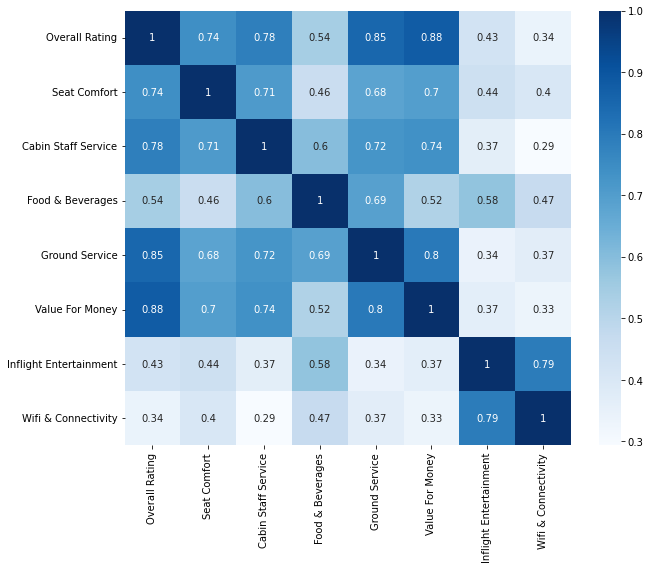

In [20]:
corr = df.corr()
plt.figure(figsize=(10, 8))  # Adjust the width and height as needed
sb.heatmap(corr, cmap="Blues", annot=True)

### Perceptron

Λίγα λόγια για AI